<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The goal of this project is to optimize a porfolio of stocks using Efficient Frontier

In [186]:
# Geting some information from yahoo finance
!pip install yfinance

### Import & Install Libraries

In [187]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')


### Data Collection:  Accessed yahoo finance API for historical stock data

In [227]:
import pandas as pd

portfolio_tickers = ["BRK-B","AMT","JNJ","XOM"]

historical_data = yf.download(portfolio_tickers, start="2021-04-01", end=None)["Adj Close"]

df = pd.DataFrame(historical_data)

df


[*********************100%%**********************]  4 of 4 completed


Ticker,AMT,BRK-B,JNJ,XOM
Date,,,,
2021-04-01,221.828613,258.200012,150.000916,50.668716
2021-04-05,226.162445,262.660004,150.553635,49.882954
2021-04-06,225.081284,263.059998,150.516800,49.741688
2021-04-07,226.125473,263.619995,150.719467,49.962414
2021-04-08,222.798859,263.510010,150.129898,49.441513
...,...,...,...,...
2024-03-26,194.100006,411.570007,155.770004,113.790001
2024-03-27,197.380005,416.929993,157.960007,114.970001
2024-03-28,197.589996,420.519989,158.190002,116.239998


### Visualization of Portfolio Adjusted Price History over time

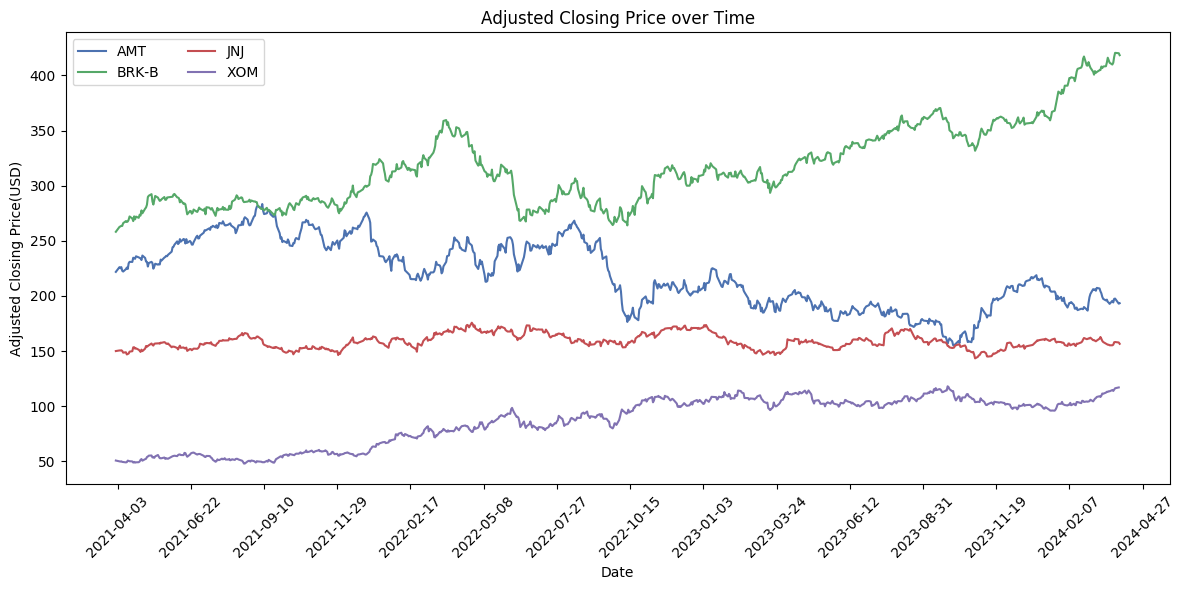

In [232]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)       # Creates and plots the graph

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price(USD)")
plt.title("Adjusted Closing Price over Time")
plt.legend(ncol=2)
plt.grid(False)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

In [190]:
# Calculating the daily return
daily_returns = df.pct_change()
daily_returns

Ticker,AMT,BRK-B,JNJ,XOM
Date,,,,
2021-04-01,NaN,NaN,NaN,NaN
2021-04-05,0.019537,0.017273,0.003685,-0.015508
2021-04-06,-0.004780,0.001523,-0.000245,-0.002832
2021-04-07,0.004639,0.002129,0.001347,0.004437
2021-04-08,-0.014711,-0.000417,-0.003912,-0.010426
...,...,...,...,...
2024-03-26,-0.007466,0.004025,0.003543,-0.007501
2024-03-27,0.016898,0.013023,0.014059,0.010370
2024-03-28,0.001064,0.008611,0.001456,0.011046


In [191]:
# Create and show the annual covariance of the portfolio
annual_covariance = daily_returns.cov()*252
annual_covariance

Ticker,AMT,BRK-B,JNJ,XOM
Ticker,,,,
AMT,0.068938,0.017653,0.012484,0.006368
BRK-B,0.017653,0.029430,0.011327,0.020932
JNJ,0.012484,0.011327,0.024780,0.004742
XOM,0.006368,0.020932,0.004742,0.082494


In [212]:
# Calculating the portfolio variance

portfolio_variance = daily_returns.var() * 252
portfolio_variance

Ticker
AMT      0.068938
BRK-B    0.029430
JNJ      0.024780
XOM      0.082494
dtype: float64

In [213]:
# Calculate the portfolio volatility aka standard deviation

annualized_volatility = daily_returns.std() * np.sqrt(252)
print("Annual Volatility:", annualized_volatility)


Annual Volatility: Ticker
AMT      0.262561
BRK-B    0.171551
JNJ      0.157418
XOM      0.287217
dtype: float64


In [214]:
pip install PyPortfolioOpt


In [215]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [216]:
# To calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMT', -0.40401), ('BRK-B', 1.0), ('JNJ', -0.23049), ('XOM', 0.63449)])
Expected annual return: 40.1%
Annual volatility: 28.3%
Sharpe Ratio: 1.35


(0.40073383094109755, 0.2827714353437635, 1.3464366741224827)

In [217]:
# In order to obtain the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 100000)

allocation,leftover = da.lp_portfolio()
print('Fund allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Fund allocation:  {'BRK-B': 145, 'XOM': 328, 'AMT': -209, 'JNJ': -147}
Funds remaining: $178.48


OrderedDict([('AMT', -0.99811), ('BRK-B', 1.00001), ('JNJ', -0.00191), ('XOM', 1.00002)])
Expected annual return: 54.2%
Annual volatility: 41.8%
Sharpe Ratio: 1.25


(0.5424966338886039, 0.41769968733697, 1.2508906511751618)

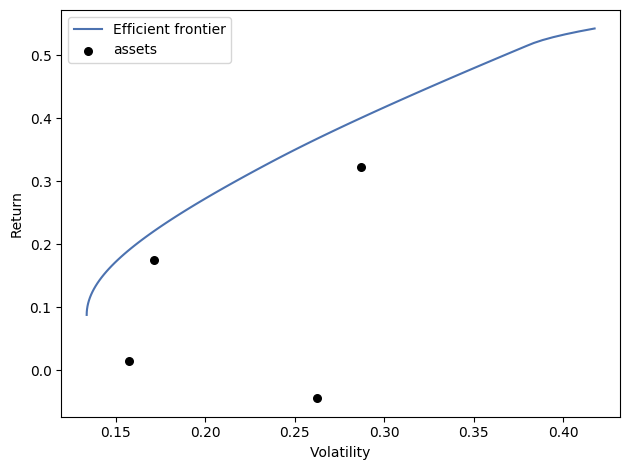

In [233]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)